# Project: Decoding Molecules From Fingerprints.
## Group Members:
### Qi Chen, e-mail: gusqichr@student.gu.se
### Nils Dunlop, e-mail: gusdunlni@student.gu.se
### Francisco Alejandro Erazo Piza, e-mail: guserafr@student.gu.se
***

In [1]:
import os
import io
import base64
from typing import List, Tuple
from concurrent.futures import ThreadPoolExecutor, as_completed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors as mcolors
from PIL import Image

from rdkit import Chem
from rdkit.Chem import AllChem, Draw, PandasTools
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator
from rdkit import DataStructs
from rdkit.DataStructs import TanimotoSimilarity

from joblib import Parallel, delayed
from sklearn.manifold import MDS, TSNE

# Pandas display settings
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

### Define directories
***

In [2]:
# Set user directory
USER_DIR = os.path.expanduser('~')

# Set the project root directory
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Define the input and output directories
INPUT_DIR = os.path.join(PROJECT_ROOT, 'data/bit_flipping_nn_review_2')

### Load Parecoxib, Celecoxib, Cimicoxib and Deracoxib, Anitrazafen Data
***

In [3]:
# Read 2 random flips
parecoxib_df_2 = pd.read_parquet(os.path.join(INPUT_DIR, 'parecoxib_df_2_random_flips.parquet'))
print(f"Parecoxib shape: {parecoxib_df_2.shape}")

celecoxib_df_2 = pd.read_parquet(os.path.join(INPUT_DIR, 'celecoxib_df_2_random_flips.parquet'))
print(f"Celecoxib shape: {celecoxib_df_2.shape}")

cimicoxib_df_2 = pd.read_parquet(os.path.join(INPUT_DIR, 'cimicoxib_df_2_random_flips.parquet'))
print(f"Cimicoxib shape: {cimicoxib_df_2.shape}")

deracoxib_df_2 = pd.read_parquet(os.path.join(INPUT_DIR, 'deracoxib_df_2_random_flips.parquet'))
print(f"Deracoxib shape: {deracoxib_df_2.shape}")

anitrazafen_df_2 = pd.read_parquet(os.path.join(INPUT_DIR, 'anitrazafen_df_2_random_flips.parquet'))
print(f"Anitrazafen shape: {anitrazafen_df_2.shape}")

Parecoxib shape: (1024, 9)
Celecoxib shape: (1024, 9)
Cimicoxib shape: (1024, 9)
Deracoxib shape: (1024, 9)
Anitrazafen shape: (1024, 9)


In [4]:
# Read 4 random flips
parecoxib_df_4 = pd.read_parquet(os.path.join(INPUT_DIR, 'parecoxib_df_4_random_flips.parquet'))
print(f"Parecoxib shape: {parecoxib_df_4.shape}")

celecoxib_df_4 = pd.read_parquet(os.path.join(INPUT_DIR, 'celecoxib_df_4_random_flips.parquet'))
print(f"Celecoxib shape: {celecoxib_df_4.shape}")

cimicoxib_df_4 = pd.read_parquet(os.path.join(INPUT_DIR, 'cimicoxib_df_4_random_flips.parquet'))
print(f"Cimicoxib shape: {cimicoxib_df_4.shape}")

deracoxib_df_4 = pd.read_parquet(os.path.join(INPUT_DIR, 'deracoxib_df_4_random_flips.parquet'))
print(f"Deracoxib shape: {deracoxib_df_4.shape}")

anitrazafen_df_4 = pd.read_parquet(os.path.join(INPUT_DIR, 'anitrazafen_df_4_random_flips.parquet'))
print(f"Anitrazafen shape: {anitrazafen_df_4.shape}")

Parecoxib shape: (512, 9)
Celecoxib shape: (512, 9)
Cimicoxib shape: (512, 9)
Deracoxib shape: (512, 9)
Anitrazafen shape: (512, 9)


In [5]:
# Read 8 random flips
parecoxib_df_8 = pd.read_parquet(os.path.join(INPUT_DIR, 'parecoxib_df_8_random_flips.parquet'))
print(f"Parecoxib shape: {parecoxib_df_8.shape}")

celecoxib_df_8 = pd.read_parquet(os.path.join(INPUT_DIR, 'celecoxib_df_8_random_flips.parquet'))
print(f"Celecoxib shape: {celecoxib_df_8.shape}")

cimicoxib_df_8 = pd.read_parquet(os.path.join(INPUT_DIR, 'cimicoxib_df_8_random_flips.parquet'))
print(f"Cimicoxib shape: {cimicoxib_df_8.shape}")

deracoxib_df_8 = pd.read_parquet(os.path.join(INPUT_DIR, 'deracoxib_df_8_random_flips.parquet'))
print(f"Deracoxib shape: {deracoxib_df_8.shape}")

anitrazafen_df_8 = pd.read_parquet(os.path.join(INPUT_DIR, 'anitrazafen_df_8_random_flips.parquet'))
print(f"Anitrazafen shape: {anitrazafen_df_8.shape}")

Parecoxib shape: (256, 9)
Celecoxib shape: (256, 9)
Cimicoxib shape: (256, 9)
Deracoxib shape: (256, 9)
Anitrazafen shape: (256, 9)


In [6]:
# Read 128 random flips
parecoxib_df_128 = pd.read_parquet(os.path.join(INPUT_DIR, 'parecoxib_df_128_random_flips.parquet'))
print(f"Parecoxib shape: {parecoxib_df_128.shape}")

celecoxib_df_128 = pd.read_parquet(os.path.join(INPUT_DIR, 'celecoxib_df_128_random_flips.parquet'))
print(f"Celecoxib shape: {celecoxib_df_128.shape}")

cimicoxib_df_128 = pd.read_parquet(os.path.join(INPUT_DIR, 'cimicoxib_df_128_random_flips.parquet'))
print(f"Cimicoxib shape: {cimicoxib_df_128.shape}")

deracoxib_df_128 = pd.read_parquet(os.path.join(INPUT_DIR, 'deracoxib_df_128_random_flips.parquet'))
print(f"Deracoxib shape: {deracoxib_df_128.shape}")

anitrazafen_df_128 = pd.read_parquet(os.path.join(INPUT_DIR, 'anitrazafen_df_128_random_flips.parquet'))
print(f"Anitrazafen shape: {anitrazafen_df_128.shape}")

Parecoxib shape: (16, 9)
Celecoxib shape: (16, 9)
Cimicoxib shape: (16, 9)
Deracoxib shape: (16, 9)
Anitrazafen shape: (16, 9)


In [7]:
# Read 1024 random flips
parecoxib_df_1024 = pd.read_parquet(os.path.join(INPUT_DIR, 'parecoxib_df_1024_random_flips.parquet'))
print(f"Parecoxib shape: {parecoxib_df_1024.shape}")

celecoxib_df_1024 = pd.read_parquet(os.path.join(INPUT_DIR, 'celecoxib_df_1024_random_flips.parquet'))
print(f"Celecoxib shape: {celecoxib_df_1024.shape}")

cimicoxib_df_1024 = pd.read_parquet(os.path.join(INPUT_DIR, 'cimicoxib_df_1024_random_flips.parquet'))
print(f"Cimicoxib shape: {cimicoxib_df_1024.shape}")

deracoxib_df_1024 = pd.read_parquet(os.path.join(INPUT_DIR, 'deracoxib_df_1024_random_flips.parquet'))
print(f"Deracoxib shape: {deracoxib_df_1024.shape}")

anitrazafen_df_1024 = pd.read_parquet(os.path.join(INPUT_DIR, 'anitrazafen_df_1024_random_flips.parquet'))
print(f"Anitrazafen shape: {anitrazafen_df_1024.shape}")

Parecoxib shape: (2, 9)
Celecoxib shape: (2, 9)
Cimicoxib shape: (2, 9)
Deracoxib shape: (2, 9)
Anitrazafen shape: (2, 9)


### Validate generated SMILES
***

In [8]:
# Function to convert SMILES to molecule and check validity
def smiles_to_mol(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return mol is not None, mol

In [9]:
# Validate generated SMILES
parecoxib_df_2['Valid_SMILES'], parecoxib_df_2['Molecule'] = zip(*parecoxib_df_2['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
celecoxib_df_2['Valid_SMILES'], celecoxib_df_2['Molecule'] = zip(*celecoxib_df_2['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
cimicoxib_df_2['Valid_SMILES'], cimicoxib_df_2['Molecule'] = zip(*cimicoxib_df_2['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
deracoxib_df_2['Valid_SMILES'], deracoxib_df_2['Molecule'] = zip(*deracoxib_df_2['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
anitrazafen_df_2['Valid_SMILES'], anitrazafen_df_2['Molecule'] = zip(*anitrazafen_df_2['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))

parecoxib_df_4['Valid_SMILES'], parecoxib_df_4['Molecule'] = zip(*parecoxib_df_4['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
celecoxib_df_4['Valid_SMILES'], celecoxib_df_4['Molecule'] = zip(*celecoxib_df_4['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
cimicoxib_df_4['Valid_SMILES'], cimicoxib_df_4['Molecule'] = zip(*cimicoxib_df_4['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
deracoxib_df_4['Valid_SMILES'], deracoxib_df_4['Molecule'] = zip(*deracoxib_df_4['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
anitrazafen_df_4['Valid_SMILES'], anitrazafen_df_4['Molecule'] = zip(*anitrazafen_df_4['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))

parecoxib_df_8['Valid_SMILES'], parecoxib_df_8['Molecule'] = zip(*parecoxib_df_8['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
celecoxib_df_8['Valid_SMILES'], celecoxib_df_8['Molecule'] = zip(*celecoxib_df_8['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
cimicoxib_df_8['Valid_SMILES'], cimicoxib_df_8['Molecule'] = zip(*cimicoxib_df_8['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
deracoxib_df_8['Valid_SMILES'], deracoxib_df_8['Molecule'] = zip(*deracoxib_df_8['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
anitrazafen_df_8['Valid_SMILES'], anitrazafen_df_8['Molecule'] = zip(*anitrazafen_df_8['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))

parecoxib_df_128['Valid_SMILES'], parecoxib_df_128['Molecule'] = zip(*parecoxib_df_128['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
celecoxib_df_128['Valid_SMILES'], celecoxib_df_128['Molecule'] = zip(*celecoxib_df_128['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
cimicoxib_df_128['Valid_SMILES'], cimicoxib_df_128['Molecule'] = zip(*cimicoxib_df_128['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
deracoxib_df_128['Valid_SMILES'], deracoxib_df_128['Molecule'] = zip(*deracoxib_df_128['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
anitrazafen_df_128['Valid_SMILES'], anitrazafen_df_128['Molecule'] = zip(*anitrazafen_df_128['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))

parecoxib_df_1024['Valid_SMILES'], parecoxib_df_1024['Molecule'] = zip(*parecoxib_df_1024['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
celecoxib_df_1024['Valid_SMILES'], celecoxib_df_1024['Molecule'] = zip(*celecoxib_df_1024['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
cimicoxib_df_1024['Valid_SMILES'], cimicoxib_df_1024['Molecule'] = zip(*cimicoxib_df_1024['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
deracoxib_df_1024['Valid_SMILES'], deracoxib_df_1024['Molecule'] = zip(*deracoxib_df_1024['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))
anitrazafen_df_1024['Valid_SMILES'], anitrazafen_df_1024['Molecule'] = zip(*anitrazafen_df_1024['Generated_SMILES'].apply(lambda x: smiles_to_mol(x)))


[17:41:33] SMILES Parse Error: syntax error while parsing: Invalid
[17:41:33] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[17:41:33] SMILES Parse Error: syntax error while parsing: Invalid
[17:41:33] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[17:41:33] SMILES Parse Error: syntax error while parsing: Invalid
[17:41:33] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[17:41:33] SMILES Parse Error: syntax error while parsing: Invalid
[17:41:33] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[17:41:33] SMILES Parse Error: syntax error while parsing: Invalid
[17:41:33] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[17:41:33] SMILES Parse Error: syntax error while parsing: Invalid
[17:41:33] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[17:41:33] SMILES Parse Error: syntax error while parsing: Invalid
[17:41:33] SMILES Parse Err

In [10]:
def calculate_valid_smiles_percentage(df_dict):
    results = []
    
    for compound, df in df_dict.items():
        valid_smiles = df['Valid_SMILES'].sum()
        percentage = df['Valid_SMILES'].mean() * 100
        results.append({
            'Compound': compound,
            'Valid_SMILES': valid_smiles,
            'Percentage': percentage
        })
    
    return pd.DataFrame(results)

In [11]:
df_dict_2 = {
    'Parecoxib': parecoxib_df_2,
    'Celecoxib': celecoxib_df_2,
    'Cimicoxib': cimicoxib_df_2,
    'Deracoxib': deracoxib_df_2,
    'Anitrazafen': anitrazafen_df_2
}

valid_smiles_percentage_2 = calculate_valid_smiles_percentage(df_dict_2)
valid_smiles_percentage_2


,Compound,Valid_SMILES,Percentage
0,Parecoxib,1024,100.000000
1,Celecoxib,1024,100.000000
2,Cimicoxib,1024,100.000000
3,Deracoxib,1023,99.902344
4,Anitrazafen,1024,100.000000


In [12]:
df_dict_4 = {
    'Parecoxib': parecoxib_df_4,
    'Celecoxib': celecoxib_df_4,
    'Cimicoxib': cimicoxib_df_4,
    'Deracoxib': deracoxib_df_4,
    'Anitrazafen': anitrazafen_df_4
}
valid_smiles_percentage_4 = calculate_valid_smiles_percentage(df_dict_4)
valid_smiles_percentage_4


,Compound,Valid_SMILES,Percentage
0,Parecoxib,512,100.000000
1,Celecoxib,512,100.000000
2,Cimicoxib,512,100.000000
3,Deracoxib,511,99.804688
4,Anitrazafen,508,99.218750


In [13]:
df_dict_8 = {
    'Parecoxib': parecoxib_df_8,
    'Celecoxib': celecoxib_df_8,
    'Cimicoxib': cimicoxib_df_8,
    'Deracoxib': deracoxib_df_8,
    'Anitrazafen': anitrazafen_df_8
}
valid_smiles_percentage_8 = calculate_valid_smiles_percentage(df_dict_8)
valid_smiles_percentage_8

,Compound,Valid_SMILES,Percentage
0,Parecoxib,255,99.609375
1,Celecoxib,256,100.000000
2,Cimicoxib,256,100.000000
3,Deracoxib,256,100.000000
4,Anitrazafen,206,80.468750


In [14]:
df_dict_128 = {
    'Parecoxib': parecoxib_df_128,
    'Celecoxib': celecoxib_df_128,
    'Cimicoxib': cimicoxib_df_128,
    'Deracoxib': deracoxib_df_128,
    'Anitrazafen': anitrazafen_df_128
}
valid_smiles_percentage_128 = calculate_valid_smiles_percentage(df_dict_128)
valid_smiles_percentage_128

,Compound,Valid_SMILES,Percentage
0,Parecoxib,12,75.00
1,Celecoxib,8,50.00
2,Cimicoxib,11,68.75
3,Deracoxib,13,81.25
4,Anitrazafen,7,43.75


In [15]:
df_dict_1024 = {
    'Parecoxib': parecoxib_df_1024,
    'Celecoxib': celecoxib_df_1024,
    'Cimicoxib': cimicoxib_df_1024,
    'Deracoxib': deracoxib_df_1024,
    'Anitrazafen': anitrazafen_df_1024
}
valid_smiles_percentage_1024 = calculate_valid_smiles_percentage(df_dict_1024)
valid_smiles_percentage_1024

,Compound,Valid_SMILES,Percentage
0,Parecoxib,0,0.0
1,Celecoxib,0,0.0
2,Cimicoxib,1,50.0
3,Deracoxib,0,0.0
4,Anitrazafen,0,0.0


### Tanimoto similarity
***

In [16]:
def calculate_tanimoto_safe(fp_bits1, fp_bits2):
    """
    Calculate Tanimoto similarity between two fingerprint bit vectors.
    """
    try:
        # Convert bit vectors to numpy arrays if they aren't already
        fp_bits1 = np.array(fp_bits1)
        fp_bits2 = np.array(fp_bits2)
        
        # Verify that both fingerprints have the same length
        if len(fp_bits1) != len(fp_bits2):
            print(f"Fingerprint lengths don't match: {len(fp_bits1)} vs {len(fp_bits2)}")
            return None
            
        # Calculate intersection (AND) and union (OR)
        intersection = np.sum(fp_bits1 & fp_bits2)
        union = np.sum(fp_bits1 | fp_bits2)
        
        # Avoid division by zero
        if union == 0:
            print("Warning: Union of fingerprints is zero")
            return 0.0
            
        # Calculate Tanimoto similarity
        tanimoto = intersection / union
        
        return float(tanimoto)
        
    except Exception as e:
        print(f"Error calculating Tanimoto similarity: {e}")
        return None

In [17]:
parecoxib_df_2['Tanimoto'] = parecoxib_df_2.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
celecoxib_df_2['Tanimoto'] = celecoxib_df_2.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
cimicoxib_df_2['Tanimoto'] = cimicoxib_df_2.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
deracoxib_df_2['Tanimoto'] = deracoxib_df_2.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
anitrazafen_df_2['Tanimoto'] = anitrazafen_df_2.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)

parecoxib_df_4['Tanimoto'] = parecoxib_df_4.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
celecoxib_df_4['Tanimoto'] = celecoxib_df_4.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
cimicoxib_df_4['Tanimoto'] = cimicoxib_df_4.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
deracoxib_df_4['Tanimoto'] = deracoxib_df_4.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
anitrazafen_df_4['Tanimoto'] = anitrazafen_df_4.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)

parecoxib_df_8['Tanimoto'] = parecoxib_df_8.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
celecoxib_df_8['Tanimoto'] = celecoxib_df_8.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
cimicoxib_df_8['Tanimoto'] = cimicoxib_df_8.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
deracoxib_df_8['Tanimoto'] = deracoxib_df_8.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
anitrazafen_df_8['Tanimoto'] = anitrazafen_df_8.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)

parecoxib_df_128['Tanimoto'] = parecoxib_df_128.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
celecoxib_df_128['Tanimoto'] = celecoxib_df_128.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
cimicoxib_df_128['Tanimoto'] = cimicoxib_df_128.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
deracoxib_df_128['Tanimoto'] = deracoxib_df_128.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
anitrazafen_df_128['Tanimoto'] = anitrazafen_df_128.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)

parecoxib_df_1024['Tanimoto'] = parecoxib_df_1024.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
celecoxib_df_1024['Tanimoto'] = celecoxib_df_1024.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
cimicoxib_df_1024['Tanimoto'] = cimicoxib_df_1024.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
deracoxib_df_1024['Tanimoto'] = deracoxib_df_1024.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)
anitrazafen_df_1024['Tanimoto'] = anitrazafen_df_1024.apply(lambda row: calculate_tanimoto_safe(row['FingerprintBits'], row['FingerprintBitsFlipped']), axis=1)

In [18]:
average_similarity_parecoxib_2 = parecoxib_df_2['Tanimoto'].mean()
average_similarity_celecoxib_2 = celecoxib_df_2['Tanimoto'].mean()
average_similarity_cimicoxib_2 = cimicoxib_df_2['Tanimoto'].mean()
average_similarity_deracoxib_2 = deracoxib_df_2['Tanimoto'].mean()
average_similarity_anitrazafen_2 = anitrazafen_df_2['Tanimoto'].mean()
print('*** 2 random flips ***')
print(f"Average Tanimoto Similarity for 2 random flips Parecoxib: {average_similarity_parecoxib_2}")
print(f"Average Tanimoto Similarity for 2 random flips Celecoxib: {average_similarity_celecoxib_2}")
print(f"Average Tanimoto Similarity for 2 random flips Cimicoxib: {average_similarity_cimicoxib_2}")
print(f"Average Tanimoto Similarity for 2 random flips Deracoxib: {average_similarity_deracoxib_2}")
print(f"Average Tanimoto Similarity for 2 random flips Anitrazafen: {average_similarity_anitrazafen_2}")

average_similarity_parecoxib_4 = parecoxib_df_4['Tanimoto'].mean()
average_similarity_celecoxib_4 = celecoxib_df_4['Tanimoto'].mean()
average_similarity_cimicoxib_4 = cimicoxib_df_4['Tanimoto'].mean()
average_similarity_deracoxib_4 = deracoxib_df_4['Tanimoto'].mean()
average_similarity_anitrazafen_4 = anitrazafen_df_4['Tanimoto'].mean()
print('*** 4 random flips ***')
print(f"Average Tanimoto Similarity for 4 random flips Parecoxib: {average_similarity_parecoxib_4}")
print(f"Average Tanimoto Similarity for 4 random flips Celecoxib: {average_similarity_celecoxib_4}")
print(f"Average Tanimoto Similarity for 4 random flips Cimicoxib: {average_similarity_cimicoxib_4}")
print(f"Average Tanimoto Similarity for 4 random flips Deracoxib: {average_similarity_deracoxib_4}")
print(f"Average Tanimoto Similarity for 4 random flips Anitrazafen: {average_similarity_anitrazafen_4}")

average_similarity_parecoxib_8 = parecoxib_df_8['Tanimoto'].mean()
average_similarity_celecoxib_8 = celecoxib_df_8['Tanimoto'].mean()
average_similarity_cimicoxib_8 = cimicoxib_df_8['Tanimoto'].mean()
average_similarity_deracoxib_8 = deracoxib_df_8['Tanimoto'].mean()
average_similarity_anitrazafen_8 = anitrazafen_df_8['Tanimoto'].mean()
print('*** 8 random flips ***')
print(f"Average Tanimoto Similarity for 8 random flips Parecoxib: {average_similarity_parecoxib_8}")
print(f"Average Tanimoto Similarity for 8 random flips Celecoxib: {average_similarity_celecoxib_8}")
print(f"Average Tanimoto Similarity for 8 random flips Cimicoxib: {average_similarity_cimicoxib_8}")
print(f"Average Tanimoto Similarity for 8 random flips Deracoxib: {average_similarity_deracoxib_8}")
print(f"Average Tanimoto Similarity for 8 random flips Anitrazafen: {average_similarity_anitrazafen_8}")


average_similarity_parecoxib_128 = parecoxib_df_128['Tanimoto'].mean()
average_similarity_celecoxib_128 = celecoxib_df_128['Tanimoto'].mean()
average_similarity_cimicoxib_128 = cimicoxib_df_128['Tanimoto'].mean()
average_similarity_deracoxib_128 = deracoxib_df_128['Tanimoto'].mean()
average_similarity_anitrazafen_128 = anitrazafen_df_128['Tanimoto'].mean()
print('*** 128 random flips ***')
print(f"Average Tanimoto Similarity for 128 random flips Parecoxib: {average_similarity_parecoxib_128}")
print(f"Average Tanimoto Similarity for 128 random flips Celecoxib: {average_similarity_celecoxib_128}")
print(f"Average Tanimoto Similarity for 128 random flips Cimicoxib: {average_similarity_cimicoxib_128}")
print(f"Average Tanimoto Similarity for 128 random flips Deracoxib: {average_similarity_deracoxib_128}")
print(f"Average Tanimoto Similarity for 128 random flips Anitrazafen: {average_similarity_anitrazafen_128}")

average_similarity_parecoxib_1024 = parecoxib_df_1024['Tanimoto'].mean()
average_similarity_celecoxib_1024 = celecoxib_df_1024['Tanimoto'].mean()
average_similarity_cimicoxib_1024 = cimicoxib_df_1024['Tanimoto'].mean()
average_similarity_deracoxib_1024 = deracoxib_df_1024['Tanimoto'].mean()
average_similarity_anitrazafen_1024 = anitrazafen_df_1024['Tanimoto'].mean()
print('*** 1024 random flips ***')
print(f"Average Tanimoto Similarity for 1024 random flips Parecoxib: {average_similarity_parecoxib_1024}")
print(f"Average Tanimoto Similarity for 1024 random flips Celecoxib: {average_similarity_celecoxib_1024}")
print(f"Average Tanimoto Similarity for 1024 random flips Cimicoxib: {average_similarity_cimicoxib_1024}")
print(f"Average Tanimoto Similarity for 1024 random flips Deracoxib: {average_similarity_deracoxib_1024}")
print(f"Average Tanimoto Similarity for 1024 random flips Anitrazafen: {average_similarity_anitrazafen_1024}")


*** 2 random flips ***
Average Tanimoto Similarity for 2 random flips Parecoxib: 0.956480223429952
Average Tanimoto Similarity for 2 random flips Celecoxib: 0.9523355836236935
Average Tanimoto Similarity for 2 random flips Cimicoxib: 0.9591446441857996
Average Tanimoto Similarity for 2 random flips Deracoxib: 0.9599617346938778
Average Tanimoto Similarity for 2 random flips Anitrazafen: 0.9285042576058202
*** 4 random flips ***
Average Tanimoto Similarity for 4 random flips Parecoxib: 0.916514144648088
Average Tanimoto Similarity for 4 random flips Celecoxib: 0.9089257399577164
Average Tanimoto Similarity for 4 random flips Cimicoxib: 0.9214243822529014
Average Tanimoto Similarity for 4 random flips Deracoxib: 0.9229355203619911
Average Tanimoto Similarity for 4 random flips Anitrazafen: 0.8664325482348115
*** 8 random flips ***
Average Tanimoto Similarity for 8 random flips Parecoxib: 0.8456330128205128
Average Tanimoto Similarity for 8 random flips Celecoxib: 0.832778653060438
Averag

In [19]:
def plot_similarity_distribution(df, molecule_name, n_flips):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Tanimoto'], bins=20, kde=True)
    plt.title(f'Similarity Distribution of Generated Molecules\n{molecule_name} ({n_flips} flips at a time)')
    plt.xlabel('Tanimoto Similarity')
    plt.ylabel('Count')
    plt.show()

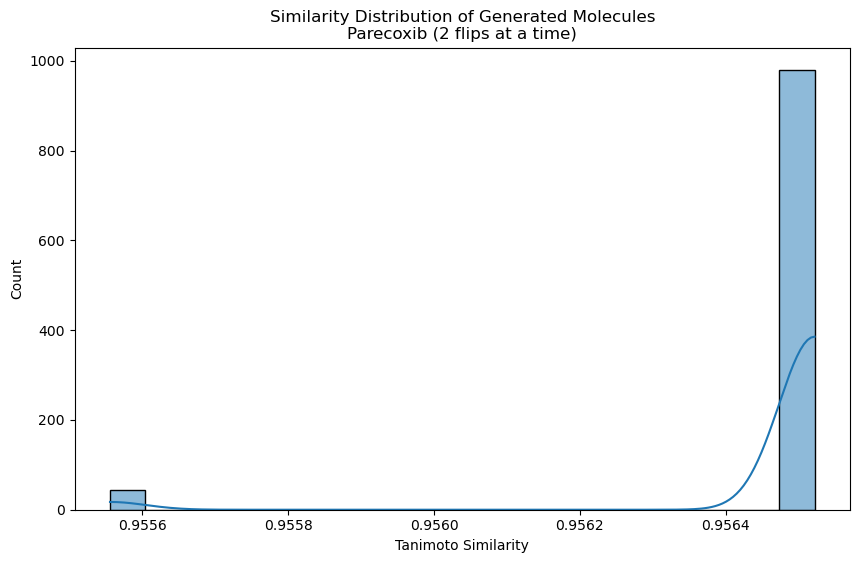

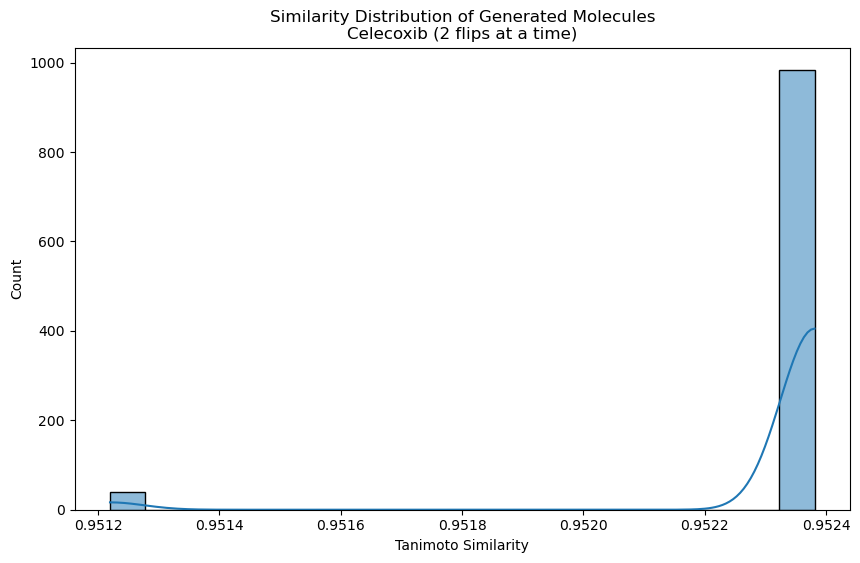

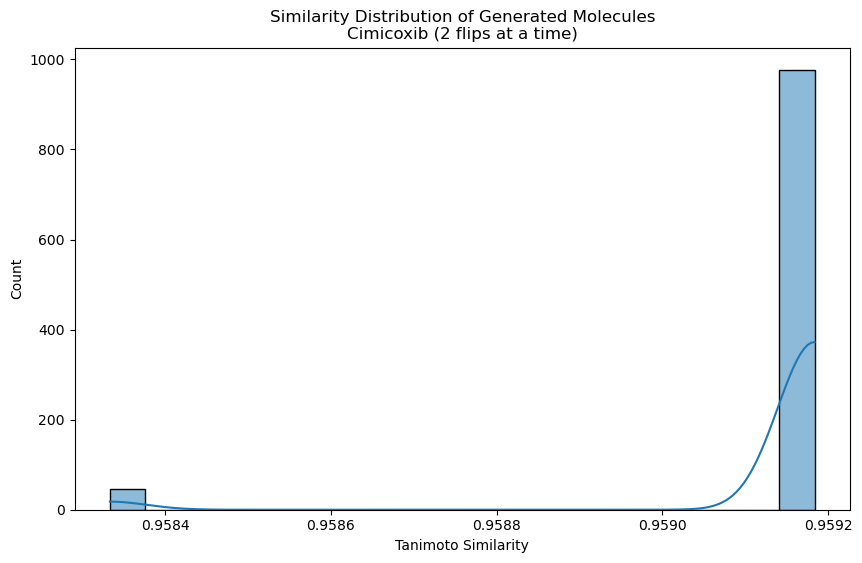

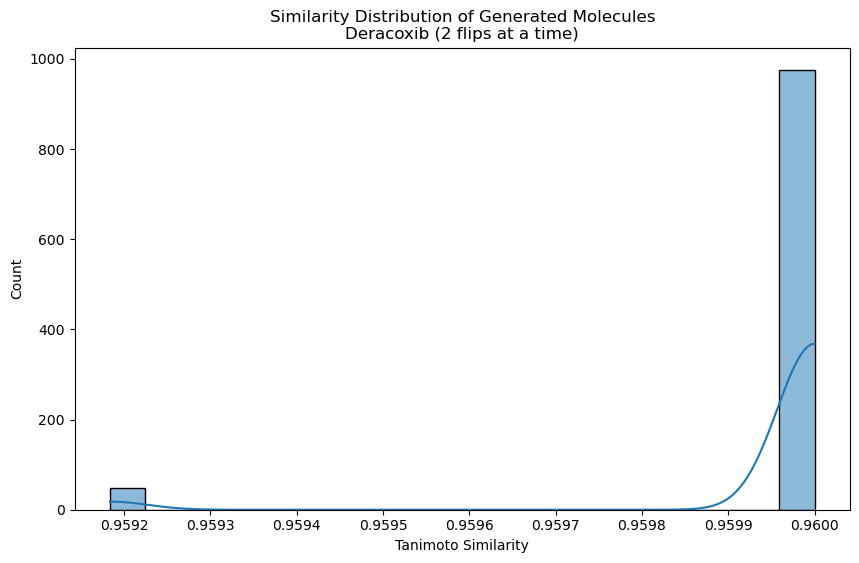

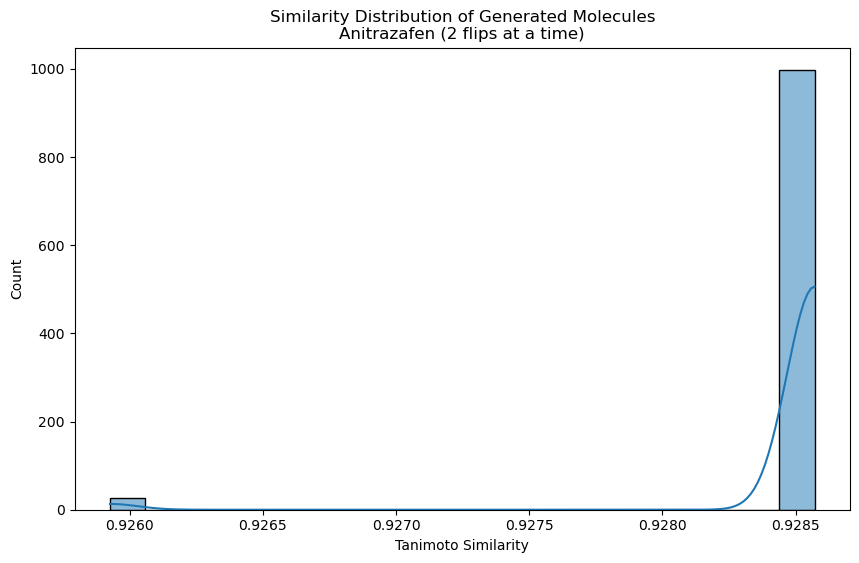

In [20]:
plot_similarity_distribution(parecoxib_df_2, 'Parecoxib', 2)
plot_similarity_distribution(celecoxib_df_2, 'Celecoxib', 2)
plot_similarity_distribution(cimicoxib_df_2, 'Cimicoxib', 2)
plot_similarity_distribution(deracoxib_df_2, 'Deracoxib', 2)
plot_similarity_distribution(anitrazafen_df_2, 'Anitrazafen', 2)

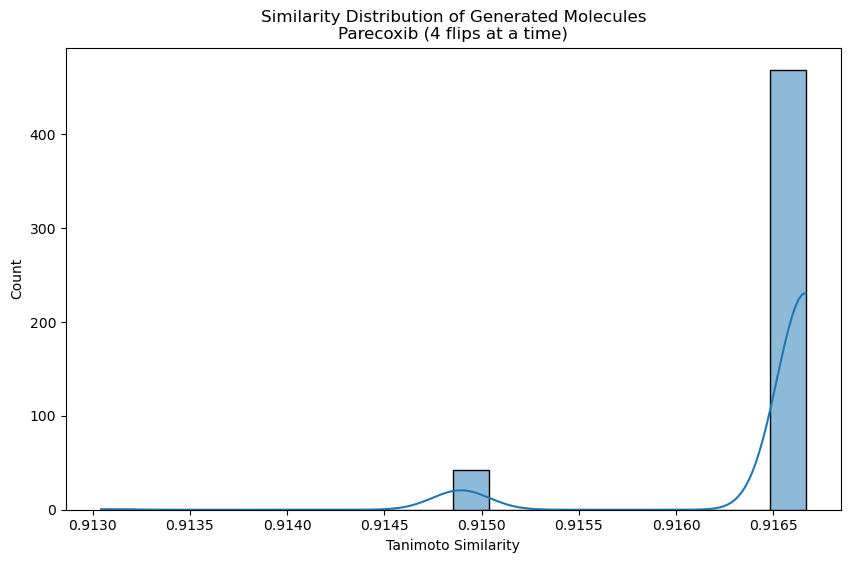

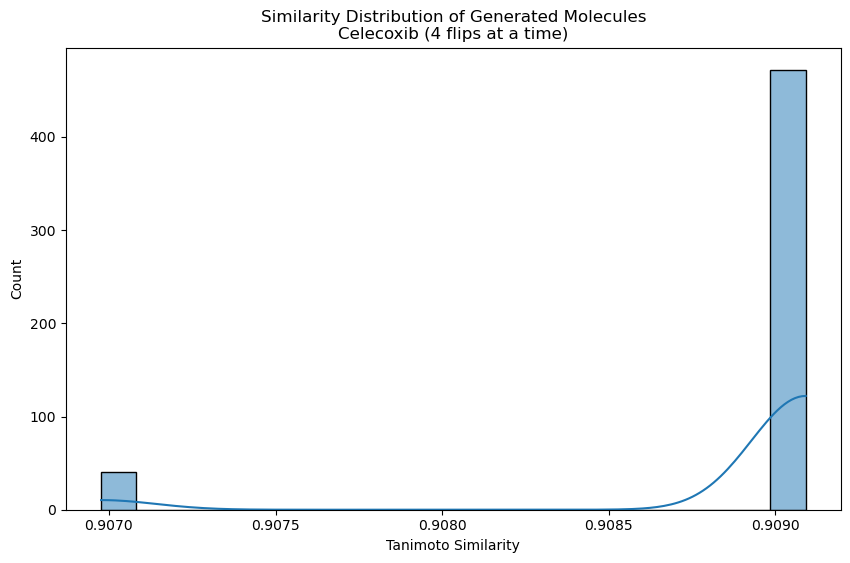

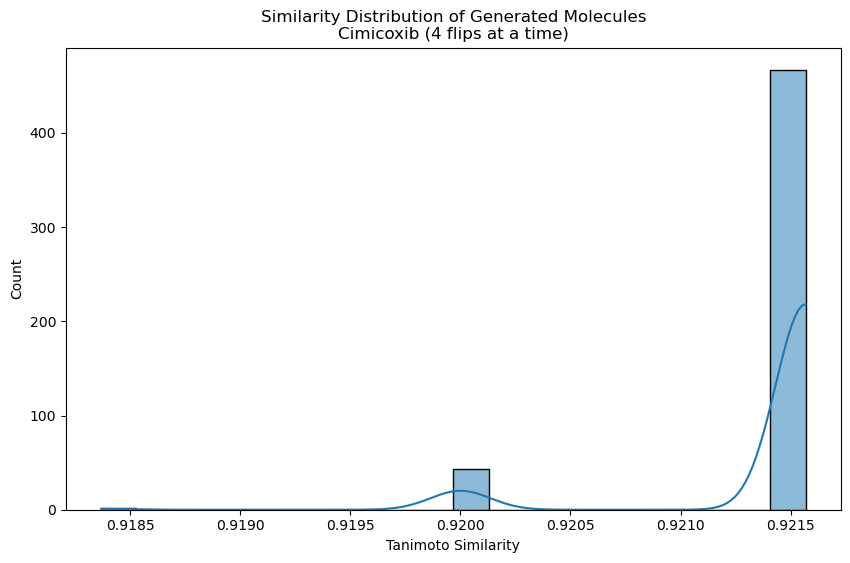

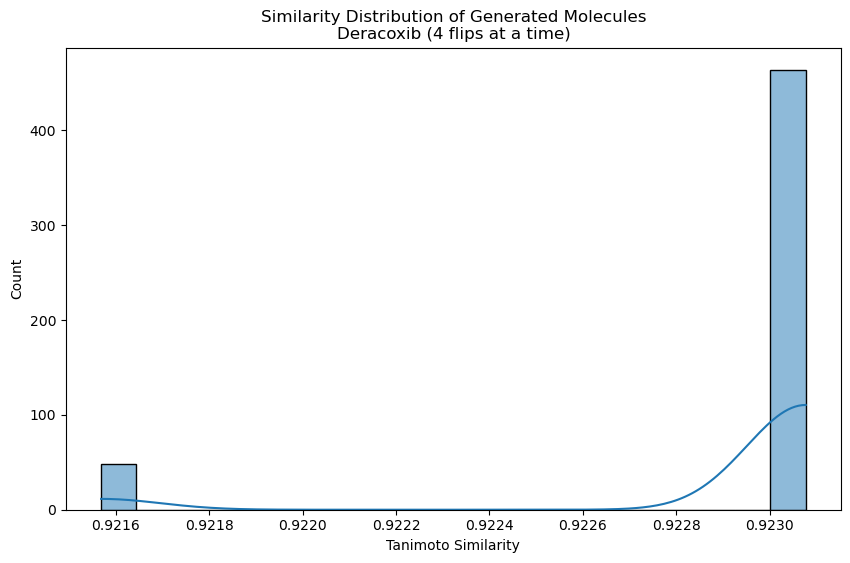

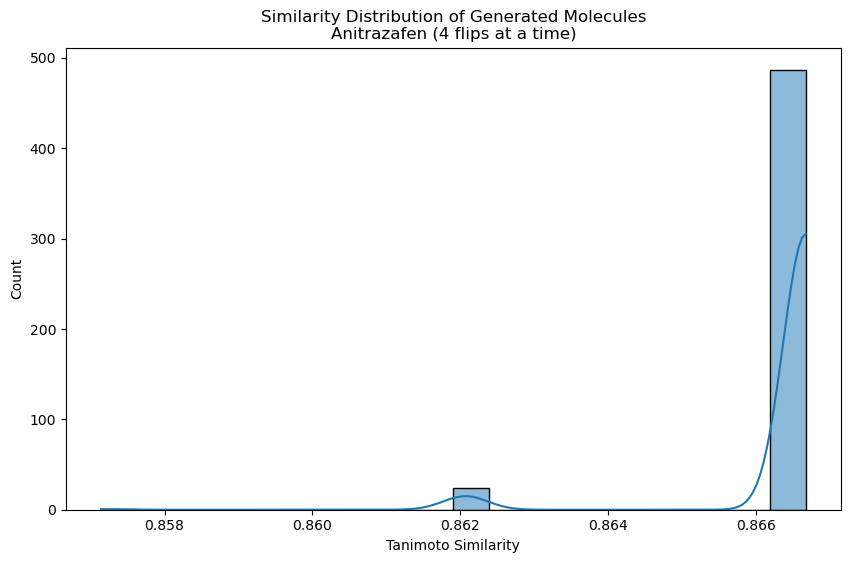

In [21]:
plot_similarity_distribution(parecoxib_df_4, 'Parecoxib', 4)
plot_similarity_distribution(celecoxib_df_4, 'Celecoxib', 4)
plot_similarity_distribution(cimicoxib_df_4, 'Cimicoxib', 4)
plot_similarity_distribution(deracoxib_df_4, 'Deracoxib', 4)
plot_similarity_distribution(anitrazafen_df_4, 'Anitrazafen', 4)

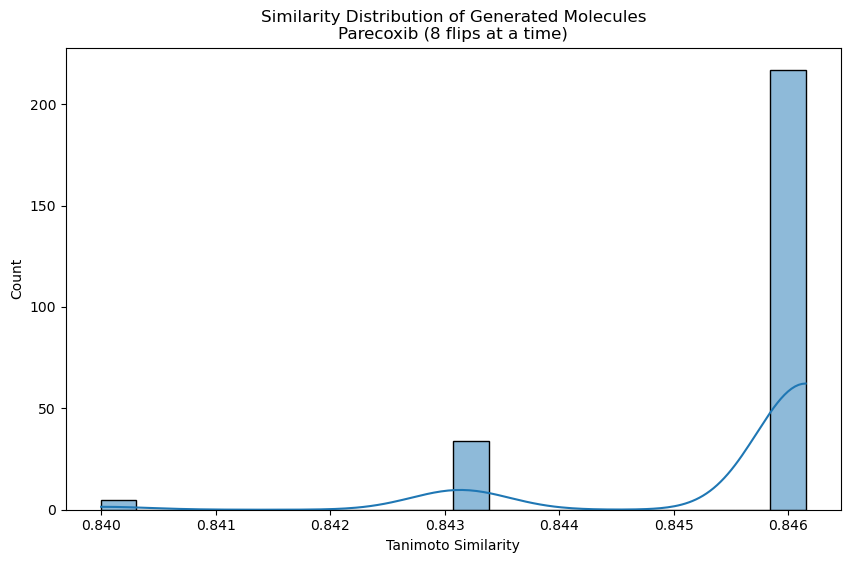

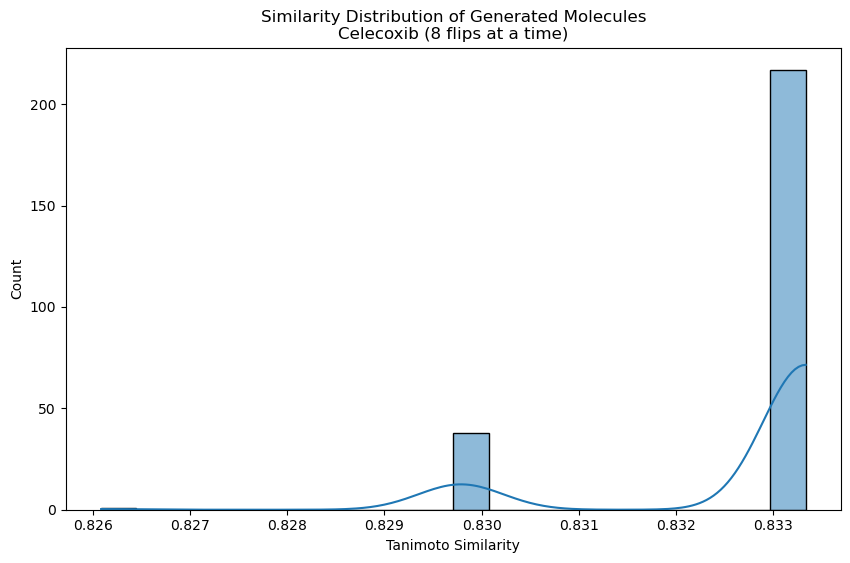

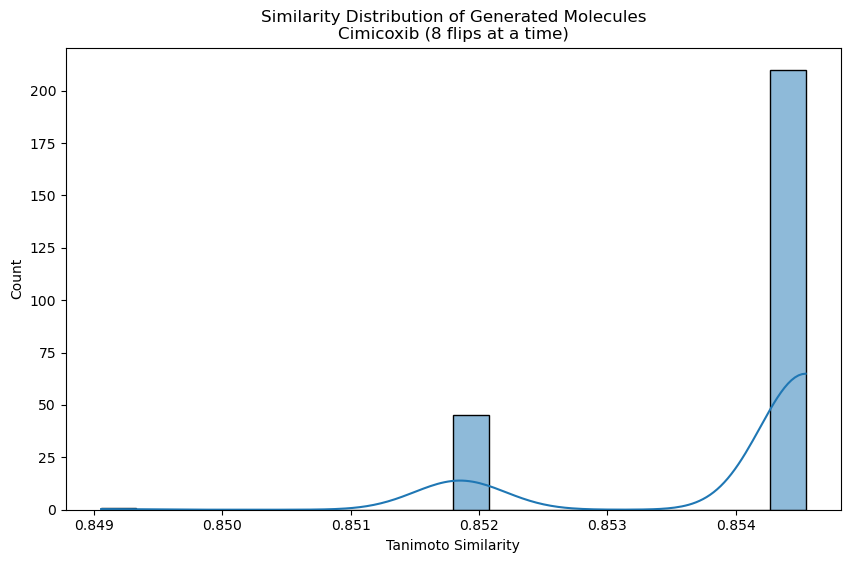

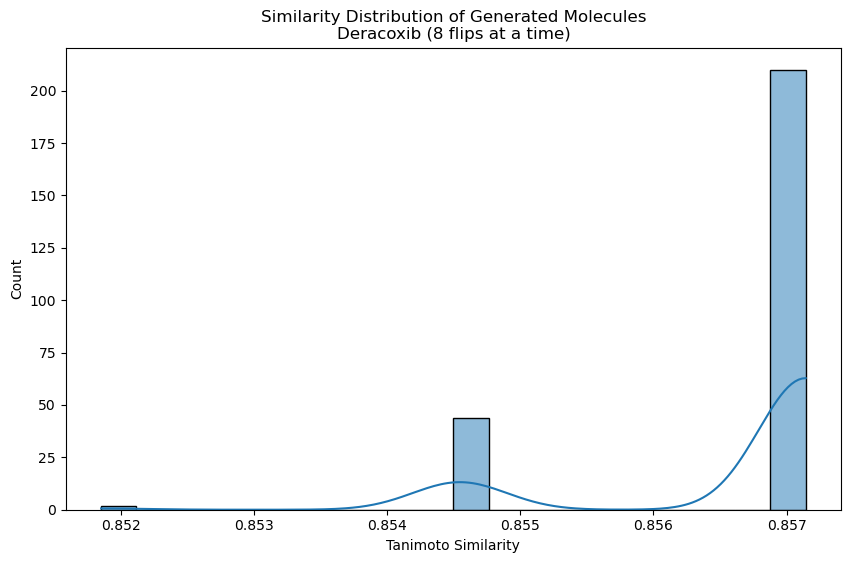

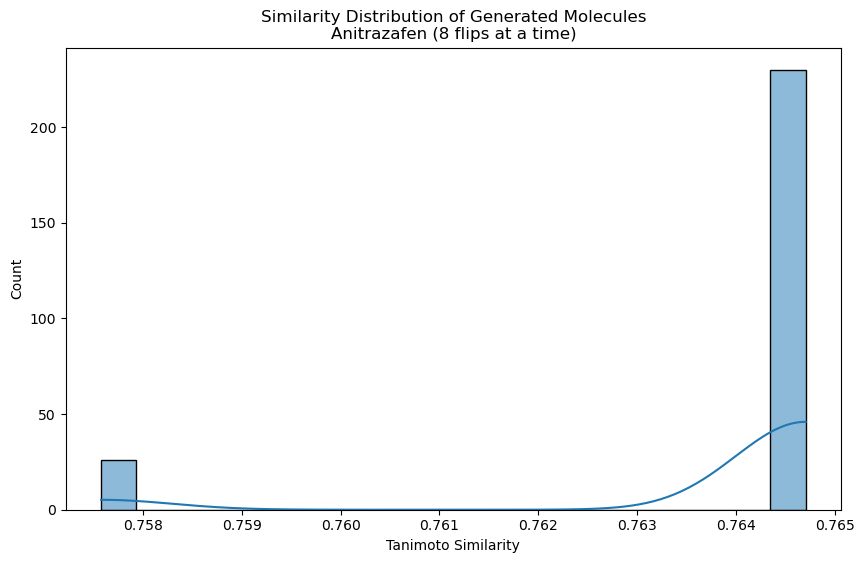

In [22]:
plot_similarity_distribution(parecoxib_df_8, 'Parecoxib', 8)
plot_similarity_distribution(celecoxib_df_8, 'Celecoxib', 8)
plot_similarity_distribution(cimicoxib_df_8, 'Cimicoxib', 8)
plot_similarity_distribution(deracoxib_df_8, 'Deracoxib', 8)
plot_similarity_distribution(anitrazafen_df_8, 'Anitrazafen', 8)

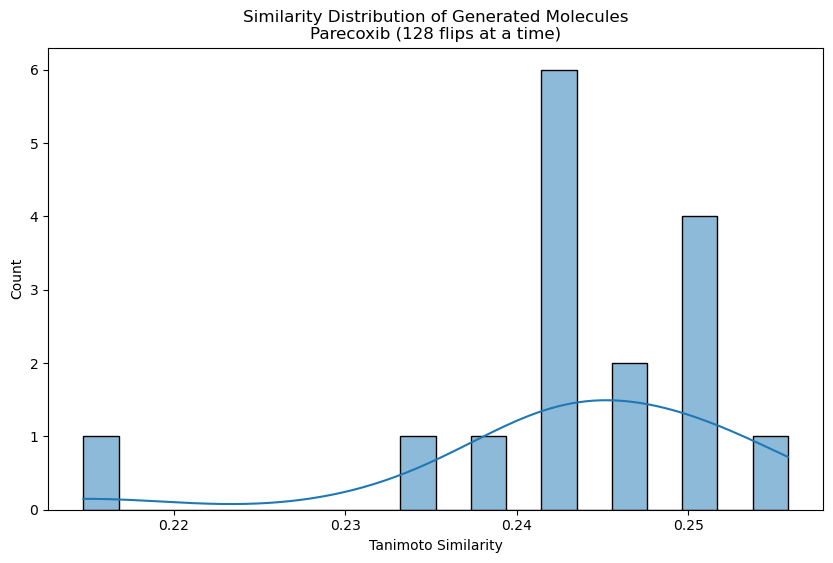

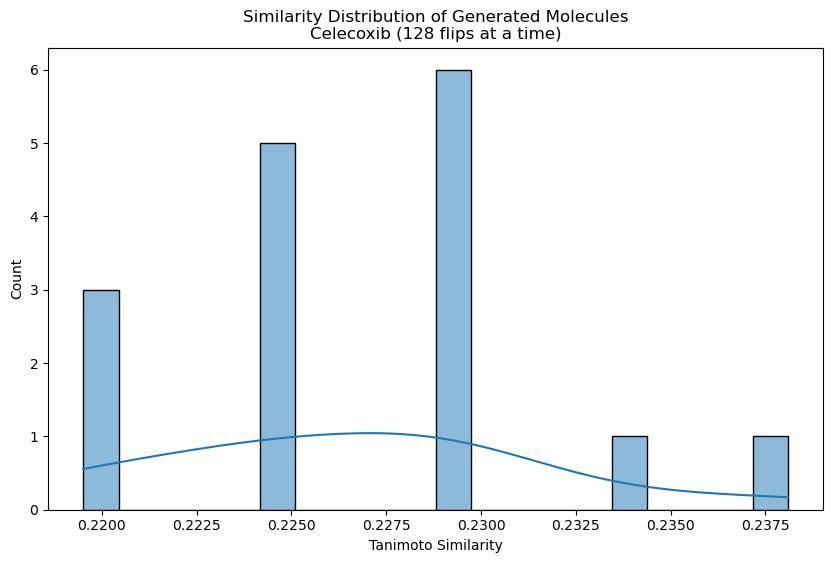

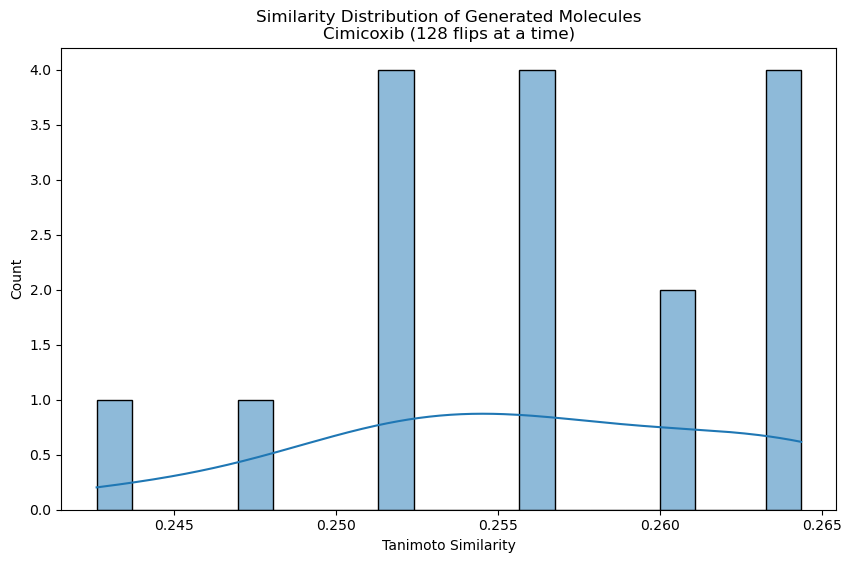

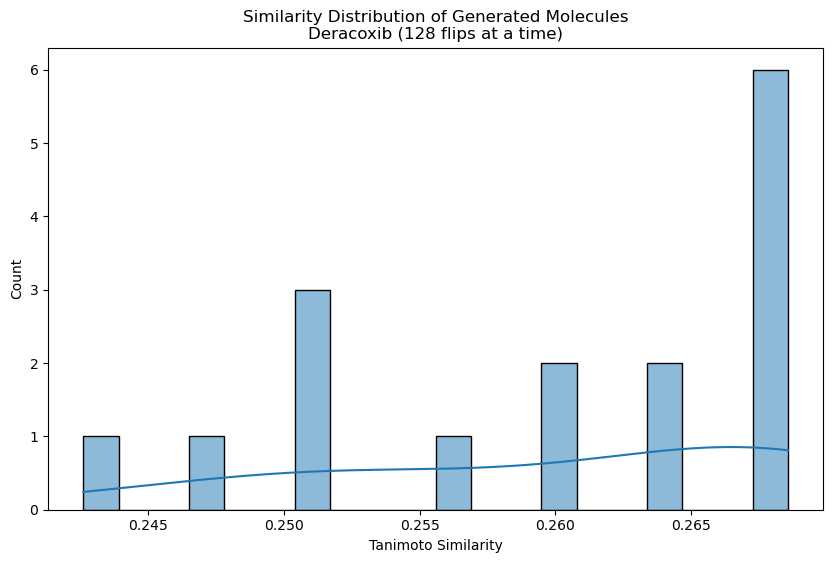

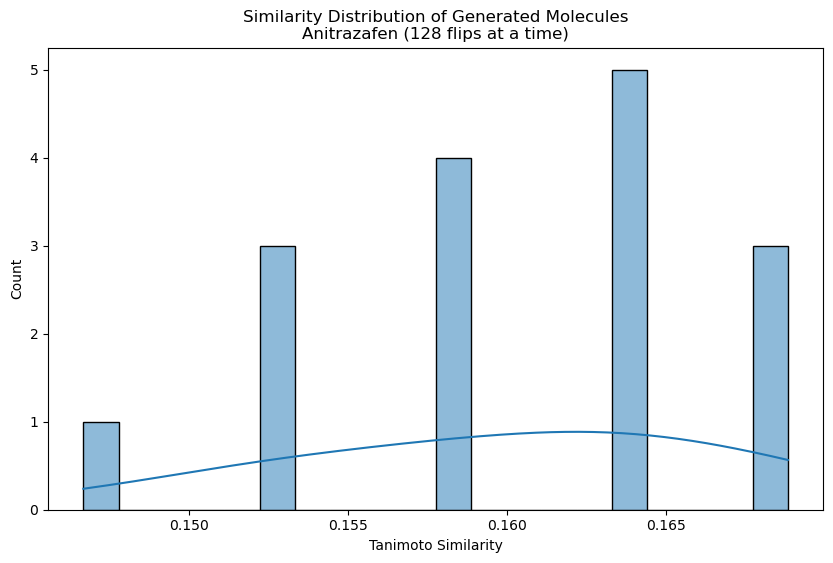

In [23]:
plot_similarity_distribution(parecoxib_df_128, 'Parecoxib', 128)
plot_similarity_distribution(celecoxib_df_128, 'Celecoxib', 128)
plot_similarity_distribution(cimicoxib_df_128, 'Cimicoxib', 128)
plot_similarity_distribution(deracoxib_df_128, 'Deracoxib', 128)
plot_similarity_distribution(anitrazafen_df_128, 'Anitrazafen', 128)

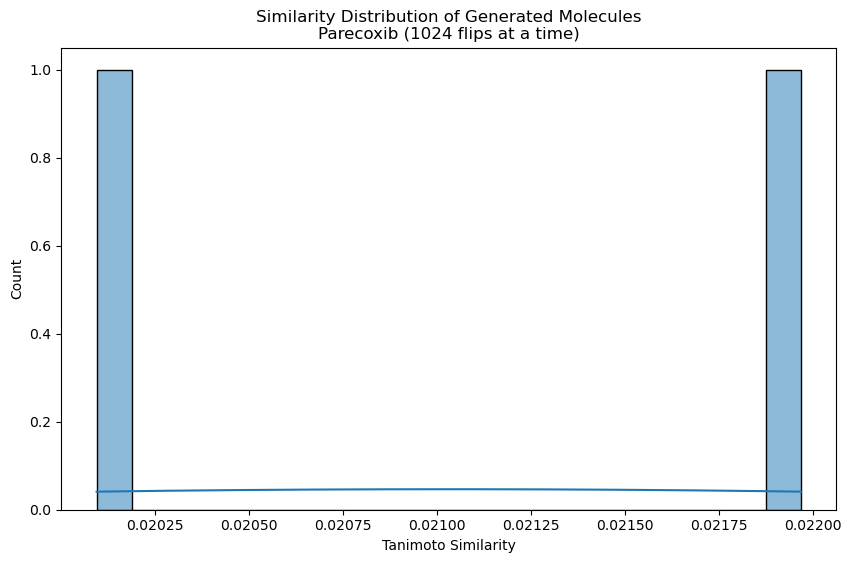

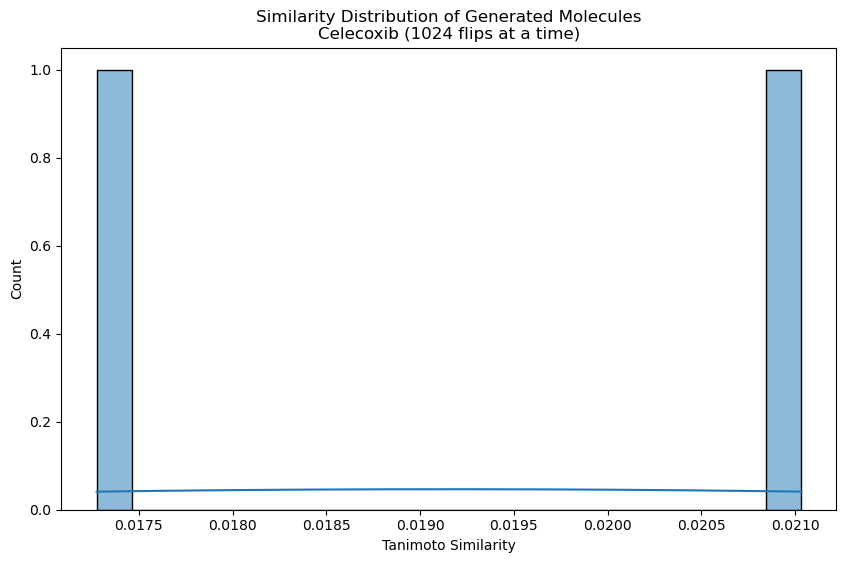

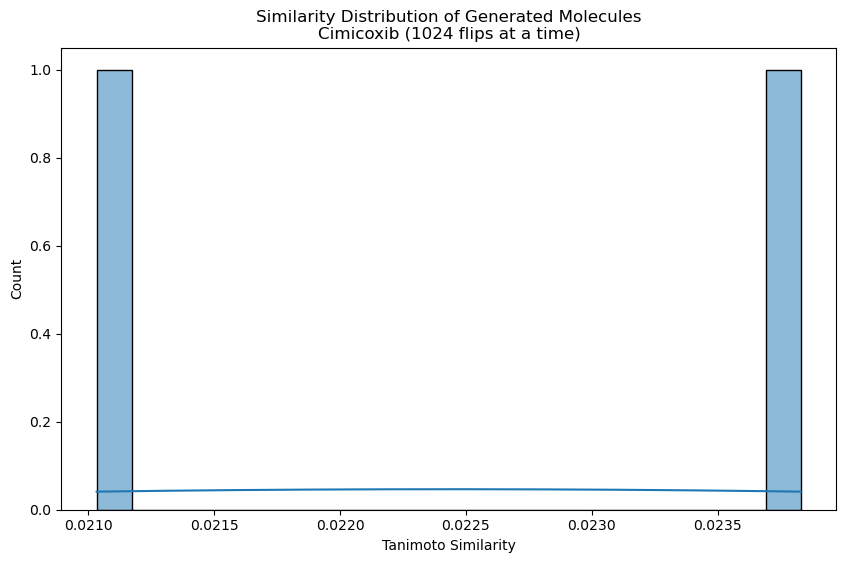

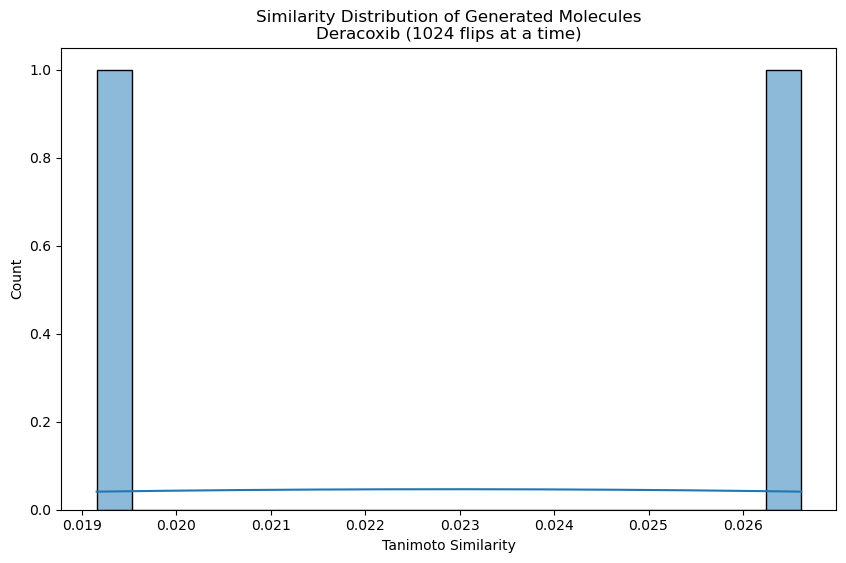

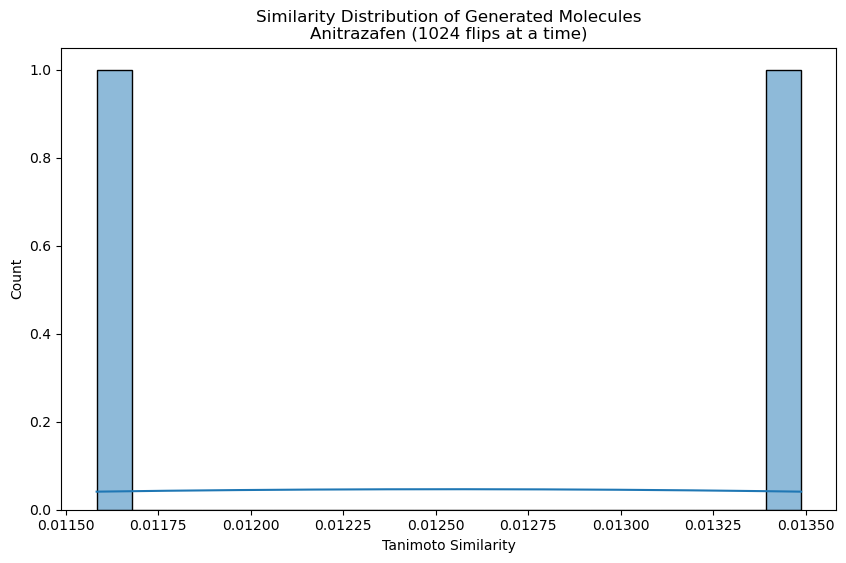

In [24]:
plot_similarity_distribution(parecoxib_df_1024, 'Parecoxib', 1024)
plot_similarity_distribution(celecoxib_df_1024, 'Celecoxib', 1024)
plot_similarity_distribution(cimicoxib_df_1024, 'Cimicoxib', 1024)
plot_similarity_distribution(deracoxib_df_1024, 'Deracoxib', 1024)
plot_similarity_distribution(anitrazafen_df_1024, 'Anitrazafen', 1024)

### Plot generated molecules
***

In [25]:
def mol_to_image(mol):
    if isinstance(mol, str):
        mol = Chem.MolFromSmiles(mol)
    if mol is None:
        return None
    img = Draw.MolToImage(mol)
    buffered = io.BytesIO()
    img.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode()

def plot_unique_molecules(df, n_flips):
    molecule_name = df.iloc[0]['title'].lower()
    
    # Create a new column in df to store the original index
    df['original_index'] = df.index

    # Remove duplicates based on 'Generated_SMILES' but keep original indices
    df_unique = df.drop_duplicates(subset=['Generated_SMILES']).copy()
    
    n_rows = len(df_unique) + 1  # +1 for the original molecule
    fig, axes = plt.subplots(n_rows, 1, figsize=(10, 5*n_rows))
    
    # Plot original molecule
    original_mol = Chem.MolFromSmiles(df.iloc[0]['SMILES'])
    img = Draw.MolToImage(original_mol)
    axes[0].imshow(img)
    axes[0].set_title(f"Original Molecule: {df.iloc[0]['title']}\nSMILES: {df.iloc[0]['SMILES']}")
    axes[0].axis('off')
    
    # Plot unique generated molecules
    for i, row in enumerate(df_unique.iterrows(), start=1):
        img = mol_to_image(row[1]['Generated_SMILES'])
        if img:
            axes[i].imshow(Image.open(io.BytesIO(base64.b64decode(img))))
            axes[i].set_title(f"Generated Molecule {i} (Flipped Bits: {row[1]['FlippedBitPositions']})\n"
                              f"SMILES: {row[1]['Generated_SMILES']}\n"
                              f"Tanimoto = {row[1].get('Tanimoto', 'N/A'):.2f}\n"
                              f"Original Index: {row[1]['original_index']}")
        else:
            axes[i].text(0.5, 0.5, "Invalid SMILES", ha='center', va='center')
        axes[i].axis('off')

    plt.tight_layout()
    plt.savefig(os.path.join(INPUT_DIR, f'{molecule_name}_{n_flips}_unique_flips.png'))
    plt.close(fig)


In [26]:
plot_unique_molecules(parecoxib_df_2,2)
plot_unique_molecules(celecoxib_df_2,2)
plot_unique_molecules(cimicoxib_df_2,2)
plot_unique_molecules(deracoxib_df_2,2)
plot_unique_molecules(anitrazafen_df_2,2)

plot_unique_molecules(parecoxib_df_4,4)
plot_unique_molecules(celecoxib_df_4,4)
plot_unique_molecules(cimicoxib_df_4,4)
plot_unique_molecules(deracoxib_df_4,4)
plot_unique_molecules(anitrazafen_df_4,4)

plot_unique_molecules(parecoxib_df_8,8)
plot_unique_molecules(celecoxib_df_8,8)
plot_unique_molecules(cimicoxib_df_8,8)
plot_unique_molecules(deracoxib_df_8,8)
plot_unique_molecules(anitrazafen_df_8,8)

plot_unique_molecules(parecoxib_df_128,128)
plot_unique_molecules(celecoxib_df_128,128)
plot_unique_molecules(cimicoxib_df_128,128)
plot_unique_molecules(deracoxib_df_128,128)
plot_unique_molecules(anitrazafen_df_128,128)

plot_unique_molecules(parecoxib_df_1024,1024)
plot_unique_molecules(celecoxib_df_1024,1024)
plot_unique_molecules(cimicoxib_df_1024,1024)
plot_unique_molecules(deracoxib_df_1024,1024)
plot_unique_molecules(anitrazafen_df_1024,1024)


[17:41:36] SMILES Parse Error: syntax error while parsing: Invalid
[17:41:36] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[17:41:39] SMILES Parse Error: syntax error while parsing: Invalid
[17:41:39] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[17:41:39] SMILES Parse Error: syntax error while parsing: Invalid
[17:41:39] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[17:41:41] SMILES Parse Error: syntax error while parsing: Invalid
[17:41:41] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[17:41:50] SMILES Parse Error: syntax error while parsing: Invalid
[17:41:50] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[17:41:55] SMILES Parse Error: syntax error while parsing: Invalid
[17:41:55] SMILES Parse Error: Failed parsing SMILES 'Invalid' for input: 'Invalid'
[17:41:55] SMILES Parse Error: syntax error while parsing: Invalid
[17:41:55] SMILES Parse Err

In [27]:
# Create a dictionary to store the data
data = {
    'Compound': [],
    '2_bits': [],
    '4_bits': [],
    '8_bits': [],
    '128_bits': [],
    '1024_bits': []
}

# List of compounds and their corresponding dataframes
compounds = [
    ('Parecoxib', parecoxib_df_2, parecoxib_df_4, parecoxib_df_8, parecoxib_df_128, parecoxib_df_1024),
    ('Celecoxib', celecoxib_df_2, celecoxib_df_4, celecoxib_df_8, celecoxib_df_128, celecoxib_df_1024),
    ('Cimicoxib', cimicoxib_df_2, cimicoxib_df_4, cimicoxib_df_8, cimicoxib_df_128, cimicoxib_df_1024),
    ('Deracoxib', deracoxib_df_2, deracoxib_df_4, deracoxib_df_8, deracoxib_df_128, deracoxib_df_1024),
    ('Anitrazafen', anitrazafen_df_2, anitrazafen_df_4, anitrazafen_df_8, anitrazafen_df_128, anitrazafen_df_1024)
]

# Iterate over each compound and their dataframes
for compound, df_2, df_4, df_8, df_128, df_1024 in compounds:
    data['Compound'].append(compound)
    data['2_bits'].append(df_2[df_2['Generated_SMILES'] != 'Invalid SMILES string']['Generated_SMILES'].nunique())
    data['4_bits'].append(df_4[df_4['Generated_SMILES'] != 'Invalid SMILES string']['Generated_SMILES'].nunique())
    data['8_bits'].append(df_8[df_8['Generated_SMILES'] != 'Invalid SMILES string']['Generated_SMILES'].nunique())
    data['128_bits'].append(df_128[df_128['Generated_SMILES'] != 'Invalid SMILES string']['Generated_SMILES'].nunique())
    data['1024_bits'].append(df_1024[df_1024['Generated_SMILES'] != 'Invalid SMILES string']['Generated_SMILES'].nunique())

# Create the dataframe
unique_valid_smiles_df = pd.DataFrame(data)

# Display the dataframe
unique_valid_smiles_df

,Compound,2_bits,4_bits,8_bits,128_bits,1024_bits
0,Parecoxib,8,11,63,12,0
1,Celecoxib,3,5,52,8,0
2,Cimicoxib,3,4,19,11,1
3,Deracoxib,2,5,39,13,0
4,Anitrazafen,24,61,115,7,0


In [28]:
# Sort DataFrame by Tanimoto similarity in descending order
anitrazafen_df_8_sorted = anitrazafen_df_8.sort_values(by='Tanimoto', ascending=True)

anitrazafen_df_8_sorted.head(10)

,title,SMILES,FingerprintBits,SparseFingerprintBits,FingerprintBitsFlipped,SparseFingerprintBitsFlipped,FlippedBitPositions,Generated_SMILES,Device_Used,Valid_SMILES,Molecule,Tanimoto,original_index
2,Anitrazafen,COc1ccc(cc1)c2nnc(C)nc2c3ccc(OC)cc3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",123 139 269 322 323 357 378 454 471 695 718 781 831 841 896 978 1057 1126 1160 1164 1380 1536 1722 1750 1855 1873,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]","[123, 139, 322, 323, 357, 364, 378, 454, 471, 695, 718, 781, 831, 841, 896, 978, 1000, 1057, 1086, 1126, 1160, 1164, 1380, 1452, 1536, 1722, 1750, 1855, 1873, 1881, 1928, 1958]","[269, 1000, 1086, 364, 1881, 1958, 1452, 1928]",COc1ccc(-c2nnc(-c3nc(C)nnc3-c3ccc(OC)cc3)nc2-c2ccc(OC)cc2)cc1,cuda,True,<rdkit.Chem.rdchem.Mol object at 0x7fd8594d99a0>,0.757576,2
12,Anitrazafen,COc1ccc(cc1)c2nnc(C)nc2c3ccc(OC)cc3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",123 139 269 322 323 357 378 454 471 695 718 781 831 841 896 978 1057 1126 1160 1164 1380 1536 1722 1750 1855 1873,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]","[123, 139, 269, 312, 322, 323, 357, 378, 454, 471, 695, 781, 831, 841, 845, 895, 896, 917, 978, 1028, 1057, 1098, 1126, 1160, 1164, 1380, 1536, 1722, 1750, 1855, 1873, 1885]","[312, 845, 718, 1028, 1885, 1098, 895, 917]",COc1ccc(-c2nc(-c3ccc(OC)cc3)c(-c3nnc(-c4ccc(OC)cc4)c4nnc(C)nc34)nc2-c2ccc(OC)cc2)cc1,cuda,True,<rdkit.Chem.rdchem.Mol object at 0x7fd8594d9cb0>,0.757576,12
25,Anitrazafen,COc1ccc(cc1)c2nnc(C)nc2c3ccc(OC)cc3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",123 139 269 322 323 357 378 454 471 695 718 781 831 841 896 978 1057 1126 1160 1164 1380 1536 1722 1750 1855 1873,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]","[123, 139, 261, 269, 322, 323, 357, 378, 454, 471, 695, 718, 781, 831, 841, 896, 954, 978, 999, 1057, 1160, 1164, 1380, 1536, 1601, 1696, 1722, 1750, 1778, 1855, 1873, 1917]","[1778, 1696, 1917, 954, 999, 1126, 1601, 261]",COc1ccc(C2=C3N=C(C)N=C3N=N2)cc1,cuda,True,<rdkit.Chem.rdchem.Mol object at 0x7fd8594da110>,0.757576,25
22,Anitrazafen,COc1ccc(cc1)c2nnc(C)nc2c3ccc(OC)cc3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",123 139 269 322 323 357 378 454 471

### Plot the nearest neighbors
***

In [29]:
def calculate_fingerprint_similarity_matrix(original_bits, flipped_bits):
    """Calculate similarity matrix comparing original and flipped fingerprint bits."""
    all_bits = [original_bits] + flipped_bits
    n = len(all_bits)
    similarity_matrix = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            # Convert bit strings to numpy arrays for comparison
            bits_i = np.array([int(b) for b in all_bits[i]])
            bits_j = np.array([int(b) for b in all_bits[j]])
            
            # Calculate Tanimoto similarity directly from bit vectors
            intersection = np.sum(np.logical_and(bits_i, bits_j))
            union = np.sum(np.logical_or(bits_i, bits_j))
            similarity_matrix[i, j] = intersection / union if union > 0 else 0
            
    return similarity_matrix

def plot_mds_similarity(df, title_column='title', n_flips=10):
    """Plot MDS similarity using original and flipped fingerprint bits."""
    if df.empty:
        print(f"Warning: Empty DataFrame for {title_column}")
        return
        
    try:
        # Store original index
        if 'original_index' not in df.columns:
            df['original_index'] = df.index

        # Get original and flipped fingerprint bits
        original_bits = df['FingerprintBits'].iloc[0]
        flipped_bits = df['FingerprintBitsFlipped'].tolist()
        
        if not flipped_bits:
            print(f"Warning: No flipped bits found for {df[title_column].iloc[0]}")
            return
            
        # Calculate similarity matrix
        similarity_matrix = calculate_fingerprint_similarity_matrix(original_bits, flipped_bits)

        # Apply MDS
        mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
        coords = mds.fit_transform(1 - similarity_matrix)

        # Calculate similarities to original fingerprint
        similarities_to_original = similarity_matrix[0, 1:]

        # Create plot
        plt.figure(figsize=(14, 10))
        
        # Plot flipped fingerprints
        scatter = plt.scatter(coords[1:, 0], coords[1:, 1], 
                            c=similarities_to_original, 
                            cmap='viridis', 
                            alpha=0.6, 
                            s=100)
        
        # Plot original fingerprint
        plt.scatter(coords[0, 0], coords[0, 1], 
                   c='red', 
                   s=200, 
                   label='Original', 
                   edgecolors='black')

        # Add color bar and labels
        cbar = plt.colorbar(scatter)
        cbar.set_label('Tanimoto Similarity to Original', rotation=270, labelpad=20)

        for i in range(len(coords)):
            label = "Original" if i == 0 else f"{df['original_index'].iloc[i-1]}"
            plt.annotate(label, 
                        (coords[i, 0], coords[i, 1]), 
                        xytext=(5, 5),
                        textcoords='offset points', 
                        fontsize=8)

        plt.title(f"2D Projection of Fingerprint Bit Similarity for {df[title_column].iloc[0]} ({n_flips} flips)")
        plt.xlabel("MDS Dimension 1")
        plt.ylabel("MDS Dimension 2")
        plt.legend()
        plt.tight_layout()
        
        filename = f'{df[title_column].iloc[0].lower()}_{n_flips}_flips_mds_similarity.png'
        plt.savefig(os.path.join(INPUT_DIR, filename))
        plt.close()
        
        return True
        
    except Exception as e:
        print(f"Error processing {df[title_column].iloc[0] if not df.empty else 'unknown'}: {str(e)}")
        plt.close()
        return False
    
def process_and_plot(df, n_flips):
    """Process dataframe and generate plot with error handling."""
    try:
        success = plot_mds_similarity(df, n_flips=n_flips)
        if success:
            print(f"MDS plot saved for {df['title'].iloc[0]} with {n_flips} flips.")
        else:
            print(f"Failed to create MDS plot for data with {n_flips} flips.")
    except Exception as e:
        print(f"Error in process_and_plot with {n_flips} flips: {str(e)}")

In [30]:
process_and_plot(parecoxib_df_2,2)
process_and_plot(celecoxib_df_2,2)
process_and_plot(cimicoxib_df_2,2)
process_and_plot(deracoxib_df_2,2)
process_and_plot(anitrazafen_df_2,2)

process_and_plot(parecoxib_df_4,4)
process_and_plot(celecoxib_df_4,4)
process_and_plot(cimicoxib_df_4,4)
process_and_plot(deracoxib_df_4,4)
process_and_plot(anitrazafen_df_4,4)

process_and_plot(parecoxib_df_8,8)
process_and_plot(celecoxib_df_8,8)
process_and_plot(cimicoxib_df_8,8)
process_and_plot(deracoxib_df_8,8)
process_and_plot(anitrazafen_df_8,8)

process_and_plot(parecoxib_df_128,128)
process_and_plot(celecoxib_df_128,128)
process_and_plot(cimicoxib_df_128,128)
process_and_plot(deracoxib_df_128,128)
process_and_plot(anitrazafen_df_128,128)

process_and_plot(parecoxib_df_1024,1024)
process_and_plot(celecoxib_df_1024,1024)
process_and_plot(cimicoxib_df_1024,1024)
process_and_plot(deracoxib_df_1024,1024)
process_and_plot(anitrazafen_df_1024,1024)

MDS plot saved for Parecoxib with 2 flips.
MDS plot saved for Celecoxib with 2 flips.
MDS plot saved for Cimicoxib with 2 flips.
MDS plot saved for Deracoxib with 2 flips.
MDS plot saved for Anitrazafen with 2 flips.
MDS plot saved for Parecoxib with 4 flips.
MDS plot saved for Celecoxib with 4 flips.
MDS plot saved for Cimicoxib with 4 flips.
MDS plot saved for Deracoxib with 4 flips.
MDS plot saved for Anitrazafen with 4 flips.
MDS plot saved for Parecoxib with 8 flips.
MDS plot saved for Celecoxib with 8 flips.
MDS plot saved for Cimicoxib with 8 flips.
MDS plot saved for Deracoxib with 8 flips.
MDS plot saved for Anitrazafen with 8 flips.
MDS plot saved for Parecoxib with 128 flips.
MDS plot saved for Celecoxib with 128 flips.
MDS plot saved for Cimicoxib with 128 flips.
MDS plot saved for Deracoxib with 128 flips.
MDS plot saved for Anitrazafen with 128 flips.
MDS plot saved for Parecoxib with 1024 flips.
MDS plot saved for Celecoxib with 1024 flips.
MDS plot saved for Cimicoxib w

In [31]:
def plot_tsne_similarity(df, title_column='title', n_flips=10):
    """Plot t-SNE similarity using original and flipped fingerprint bits."""
    if df.empty:
        print(f"Warning: Empty DataFrame for {title_column}")
        return False
        
    try:
        # Store original index
        if 'original_index' not in df.columns:
            df['original_index'] = df.index

        # Get original and flipped fingerprint bits
        original_bits = df['FingerprintBits'].iloc[0]
        flipped_bits = df['FingerprintBitsFlipped'].tolist()
        
        if not flipped_bits:
            print(f"Warning: No flipped bits found for {df[title_column].iloc[0]}")
            return False
            
        # Calculate similarity matrix using the same method as MDS
        similarity_matrix = calculate_fingerprint_similarity_matrix(original_bits, flipped_bits)

        # Adjust perplexity based on number of samples
        n_samples = len(flipped_bits) + 1  # +1 for original
        perplexity = min(30, max(5, n_samples - 1))
        
        # Apply t-SNE
        try:
            tsne = TSNE(n_components=2, 
                       metric='precomputed', 
                       random_state=42,
                       perplexity=perplexity, 
                       init='random', 
                       learning_rate='auto')
            coords = tsne.fit_transform(1 - similarity_matrix)
        except ValueError as e:
            print(f"t-SNE error for {df[title_column].iloc[0]}: {str(e)}")
            return False

        # Calculate similarities to original fingerprint
        similarities_to_original = similarity_matrix[0, 1:]

        # Create plot
        plt.figure(figsize=(14, 10))
        
        # Plot flipped fingerprints
        scatter = plt.scatter(coords[1:, 0], coords[1:, 1], 
                            c=similarities_to_original, 
                            cmap='viridis', 
                            alpha=0.6, 
                            s=100)
        
        # Plot original fingerprint
        plt.scatter(coords[0, 0], coords[0, 1], 
                   c='red', 
                   s=200, 
                   label='Original', 
                   edgecolors='black')

        # Add color bar and labels
        cbar = plt.colorbar(scatter)
        cbar.set_label('Tanimoto Similarity to Original', rotation=270, labelpad=20)

        for i in range(len(coords)):
            label = "Original" if i == 0 else f"{df['original_index'].iloc[i-1]}"
            plt.annotate(label, 
                        (coords[i, 0], coords[i, 1]), 
                        xytext=(5, 5),
                        textcoords='offset points', 
                        fontsize=8)

        plt.title(f"2D Projection of Fingerprint Bit Similarity for {df[title_column].iloc[0]} ({n_flips} flips)")
        plt.xlabel("t-SNE Dimension 1")
        plt.ylabel("t-SNE Dimension 2")
        plt.legend()
        plt.tight_layout()
        
        filename = f'{df[title_column].iloc[0].lower()}_{n_flips}_flips_tsne_similarity.png'
        plt.savefig(os.path.join(INPUT_DIR, filename))
        plt.close()
        
        return True
        
    except Exception as e:
        print(f"Error processing {df[title_column].iloc[0] if not df.empty else 'unknown'}: {str(e)}")
        plt.close()
        return False

def process_and_plot_tsne(df, n_flips):
    """Process dataframe and generate t-SNE plot with error handling."""
    try:
        success = plot_tsne_similarity(df, n_flips=n_flips)
        if success:
            print(f"t-SNE plot saved for {df['title'].iloc[0]} with {n_flips} flips.")
        else:
            print(f"Failed to create t-SNE plot for data with {n_flips} flips.")
    except Exception as e:
        print(f"Error in process_and_plot_tsne with {n_flips} flips: {str(e)}")

In [32]:
process_and_plot_tsne(parecoxib_df_2, 2)
process_and_plot_tsne(celecoxib_df_2, 2)
process_and_plot_tsne(cimicoxib_df_2, 2)
process_and_plot_tsne(deracoxib_df_2, 2)
process_and_plot_tsne(anitrazafen_df_2, 2)

process_and_plot_tsne(parecoxib_df_4, 4)
process_and_plot_tsne(celecoxib_df_4, 4)
process_and_plot_tsne(cimicoxib_df_4, 4)
process_and_plot_tsne(deracoxib_df_4, 4)
process_and_plot_tsne(anitrazafen_df_4, 4)

process_and_plot_tsne(parecoxib_df_8, 8)
process_and_plot_tsne(celecoxib_df_8, 8)
process_and_plot_tsne(cimicoxib_df_8, 8)
process_and_plot_tsne(deracoxib_df_8, 8)
process_and_plot_tsne(anitrazafen_df_8, 8)

process_and_plot_tsne(parecoxib_df_128, 128)
process_and_plot_tsne(celecoxib_df_128, 128)
process_and_plot_tsne(cimicoxib_df_128, 128)
process_and_plot_tsne(deracoxib_df_128, 128)
process_and_plot_tsne(anitrazafen_df_128, 128)

process_and_plot_tsne(parecoxib_df_1024, 1024)
process_and_plot_tsne(celecoxib_df_1024, 1024)
process_and_plot_tsne(cimicoxib_df_1024, 1024)
process_and_plot_tsne(deracoxib_df_1024, 1024)
process_and_plot_tsne(anitrazafen_df_1024, 1024)

t-SNE plot saved for Parecoxib with 2 flips.
t-SNE plot saved for Celecoxib with 2 flips.
t-SNE plot saved for Cimicoxib with 2 flips.
t-SNE plot saved for Deracoxib with 2 flips.
t-SNE plot saved for Anitrazafen with 2 flips.
t-SNE plot saved for Parecoxib with 4 flips.
t-SNE plot saved for Celecoxib with 4 flips.
t-SNE plot saved for Cimicoxib with 4 flips.
t-SNE plot saved for Deracoxib with 4 flips.
t-SNE plot saved for Anitrazafen with 4 flips.
t-SNE plot saved for Parecoxib with 8 flips.
t-SNE plot saved for Celecoxib with 8 flips.
t-SNE plot saved for Cimicoxib with 8 flips.
t-SNE plot saved for Deracoxib with 8 flips.
t-SNE plot saved for Anitrazafen with 8 flips.
t-SNE plot saved for Parecoxib with 128 flips.
t-SNE plot saved for Celecoxib with 128 flips.
t-SNE plot saved for Cimicoxib with 128 flips.
t-SNE plot saved for Deracoxib with 128 flips.
t-SNE plot saved for Anitrazafen with 128 flips.
t-SNE error for Parecoxib: perplexity must be less than n_samples
Failed to create